# 数据清洗

#1 从赔率说起

##1.1 举例一
浔阳江畔张横和张顺正在进行400米自由泳比赛，宋江开赌场坐庄，规定：张横赢赔率为3，张顺赢赔率为2，不存在平局。赌徒李逵为张横下注10两
- 若张横赢，则宋江付李逵30两(10 * 3)，赌资10两归庄家宋江所有，即李逵赚20两
- 若张顺赢，赌资10两归宋江所有，即李逵赔10两

##1.2 公平赔率
假定张横赢的概率为0.8，宋江给出的赔率为张横1.25，张顺5，则宋江的盈亏分析如下：假定所有赌徒中，共有a元买张横，b元买张顺，则赛前宋江的收入为$a+b$元；开赛后的赔付期望为$E(y)=\sum_ip_iy_i=0.8*1.25*a+0.25*5*b=a+b$。那宋江就会不赔不赚，这就是公平赔率

如果使用$y=\frac{1}{p}$作为赔率，会使得庄家在期望上不赔不赚，这就是公平赔率的$y_{fair}$。这显然是庄家不希望看到的，实际问题中，庄家总是会将公平赔率乘以某一个小余1的系数$\alpha$，得到真是赔率$y=\alpha * y_{fair}=\frac{\alpha}{p}$，但是庄家对于取值$\alpha$不公开

##1.3 举例二
假设开始了一个团购活动，还有2天就结束了，庄家给出的赔率是，如果最后参团人数是素数，赔率是5.5，如果是合数，赔率是1.1。庄家是如何计算的？当时拼团的人数为1026人，还有两天结束，根据历史的先验概率估计，1天参团人数基本为100人，则最终参团人数估计为1226人。考虑到第二天是周日，参团人数略低，那么参团人数可能就在区间$[1180,1230]$之间。这个区间的素数有$1181,1187,1193,1201,1212,1217,1223,1229$，那么素数的概率为1.157,公平赔率就是6.375，合数的概率是0.843，公平赔率就是1.186。所以给出一个赔率5.5和1.1，那么$\alpha$就是0.863和0.927

则庄家盈利期望为$E=(a+b)-E(y)=a+b-(\alpha_1*a+\alpha_2*b)=(1-\alpha_1)a+(1-\alpha_2)b$

- 假定a=b，则庄家盈利率为10.5%
- 假定$\frac{a}{b}=\frac{0.157}{0.843}$，则庄家盈利率为12.7%

#2 数据变换
输入数据为0,1,2,3,4,5

##2.1 标准化
$x_{std}^{(i)}=\frac{x^{(i)}-\mu_x}{\sigma_x}$,得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1

标准化以后得到$-1.46385,-0.87831,-0.29277,0.29277,0.87831,1.46385$

In [1]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = [[0], [1], [2], [3], [4], [5]]
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
print(X_train_scaled)

[[-1.46385011]
 [-0.87831007]
 [-0.29277002]
 [ 0.29277002]
 [ 0.87831007]
 [ 1.46385011]]


##2.2 归一化
$x_{MinMax}^{(i)}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}$,使用这种方法的目的包括：
- 对于方差非常小的属性可以增强其稳定性。
- 维持稀疏矩阵中为0的条目。

归一化以后得到$0.0,0.2,0.4,0.6,0.8,1.0$

In [6]:
from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()
X_train = [[0], [1], [2], [3], [4], [5]]
minmaxScaler.fit(X_train)
X_train_minmax=minmaxScaler.transform(X_train)
print(X_train_minmax)

[[ 0. ]
 [ 0.2]
 [ 0.4]
 [ 0.6]
 [ 0.8]
 [ 1. ]]


##2.3 正则化
正则化的过程是将每个样本缩放到单位范数（每个样本的范数为1），如果后面要使用如二次型（点积）或者其它核方法计算两个样本之间的相似性这个方法会很有用

$x_{norm}^{(i)}=\frac{x^{(i)}}{||X||_p}=\frac{x^{(i)}}{(\sum_{i=1}^n|x_i|^p)^{\frac{1}{p}}}$

对每个样本计算其p-范数，然后对该样本中每个元素除以该范数，这样处理的结果是使得每个处理后样本的p-范数（l1-norm,l2-norm）等于1

In [7]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm="l2")
X_train = [[0], [1], [2], [3], [4], [5]]
normalizer.fit(X_train)
X_train_normal=normalizer.transform(X_train)
print(X_train_normal)

[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


##2.4 PCA-维数约简
上图是随机生成的数据，下图是用PCA进行维数约简之后打散的数据

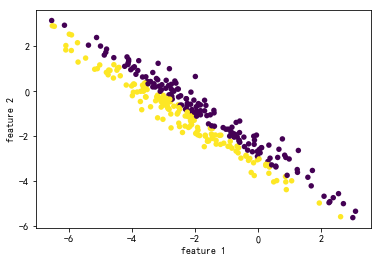

In [8]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300,2))
X_blob = np.dot(X_,rnd.normal(size=(2,2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:,0], X_blob[:,1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

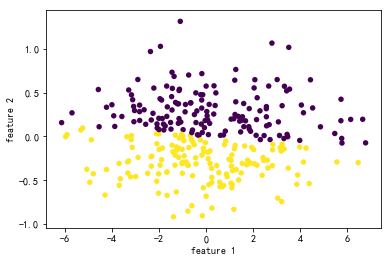

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300,2))
X_blob = np.dot(X_,rnd.normal(size=(2,2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()